In [168]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

import numpy as np 
import matplotlib 

np.random.seed(42)

# Time Series on Confirmed Cases in the US

In [169]:
confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [170]:
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,226,231,247,247,247,253,257,267,280,280
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,30,30,30,30,30,30,31,31
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,6820,6877,6922,7066,7189,7250,7465,7537,7608,7683
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,76,80,81,81,81,81,81,90,92,98


In [171]:
confirmed.shape

(3261, 175)

In [172]:
confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20',
       '6/30/20', '7/1/20', '7/2/20', '7/3/20'],
      dtype='object', length=175)

In [173]:
#dropping columns, admin2 is for county names, but we are looking at states as a whole for now
drops = ['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Admin2','Combined_Key']
confirmed = confirmed.drop(drops, axis = 1)

In [174]:
confirmed.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,226,231,247,247,247,253,257,267,280,280
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,30,30,30,30,30,30,30,30,31,31
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,6820,6877,6922,7066,7189,7250,7465,7537,7608,7683
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,76,80,81,81,81,81,81,90,92,98


In [175]:
confirmed = confirmed.set_index('Province_State')

In [176]:
#transposing the dataframe to swap columns and rows in order to fit the time series modelling requirements
confirmed_dt = confirmed.T

In [177]:
#all of the times are now in a single column
confirmed_dt.head()

Province_State,American Samoa,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands,Alabama,Alabama,Alabama,Alabama,Alabama,...,Massachusetts,Missouri,Michigan,Michigan,Utah,Utah,Utah,Utah,Utah,Utah
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
#add up all the cases in repeating columns
confirmed_dt = confirmed_dt.groupby(lambda x:x, axis=1).sum()

In [179]:
confirmed_dt = confirmed_dt.reset_index()

In [180]:
#rename index to Time from Province_State
confirmed_dt = confirmed_dt.rename({'index': 'Time'}, axis=1)

In [181]:
confirmed_dt.head()

,Time,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1/26/20,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [182]:
#make Time a datetime type
confirmed_dt.Time = pd.to_datetime(confirmed_dt['Time'])

In [183]:
#set time as the index
confirmed_dt = confirmed_dt.set_index('Time')
confirmed_dt.head()

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [184]:
confirmed_dt = confirmed_dt.sort_index()

In [185]:
#top 5 states with the most corona cases
confirmed_dt.max().sort_values(ascending = False).head(5)

New York      395872
California    250514
Texas         185591
Florida       178594
New Jersey    172742
dtype: int64

In [186]:
print('We have data between %s and %s' % (confirmed_dt.index.min(), confirmed_dt.index.max()))

We have data between 2020-01-22 00:00:00 and 2020-07-03 00:00:00


In [187]:
pd.plotting.register_matplotlib_converters()

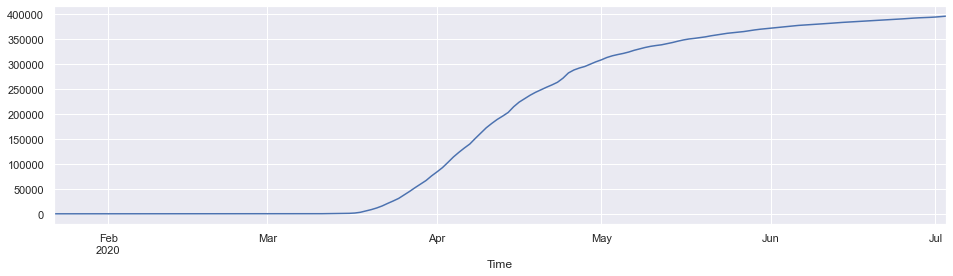

In [188]:
#how the cases grew in new york from february to july
#went from a sort of exponential curve to a logorithmic curve
confirmed_dt.loc['2020']['New York'].plot(figsize=(16, 4));

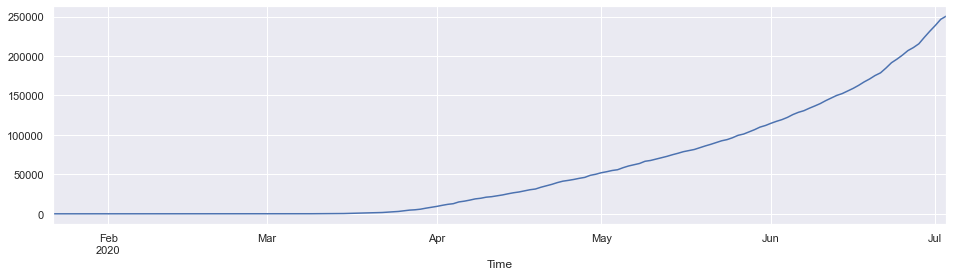

In [189]:
confirmed_dt.loc['2020']['California'].plot(figsize=(16, 4));

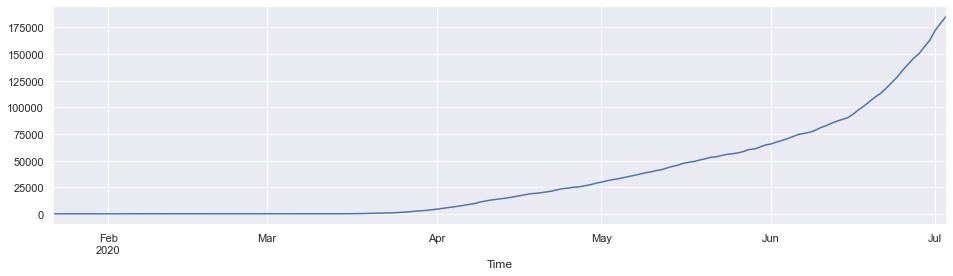

In [190]:
confirmed_dt.loc['2020']['Texas'].plot(figsize=(16, 4));

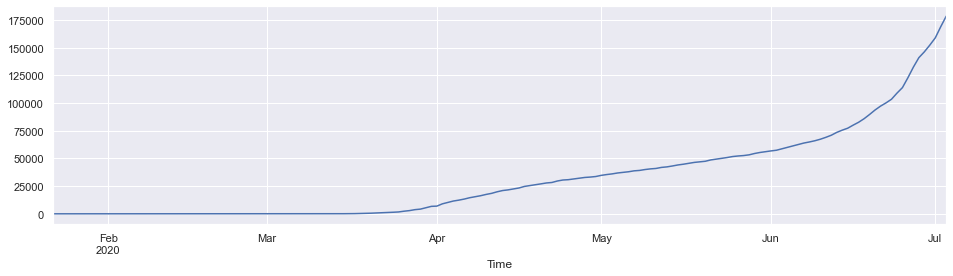

In [191]:
confirmed_dt.loc['2020']['Florida'].plot(figsize=(16, 4));

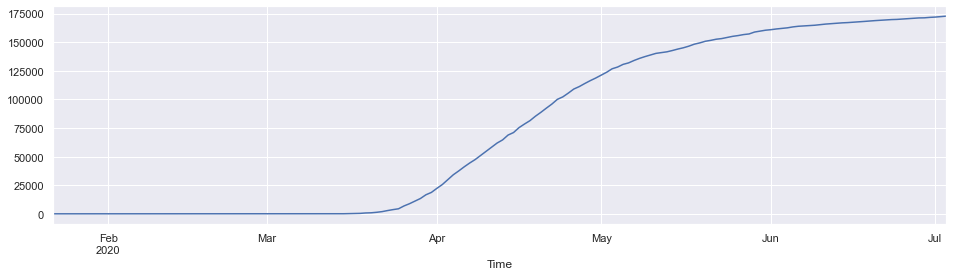

In [192]:
confirmed_dt.loc['2020']['New Jersey'].plot(figsize=(16, 4));

### We can see that, in some states, there was a spike in cases that leveled off, whereas in other states, the curve is still not flattened and is increasing

In [193]:
#total amount of cases per date in the US
confirmed_dt['total'] = confirmed_dt.sum(axis = 1)

In [194]:
confirmed_dt.head()

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2020-01-26,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


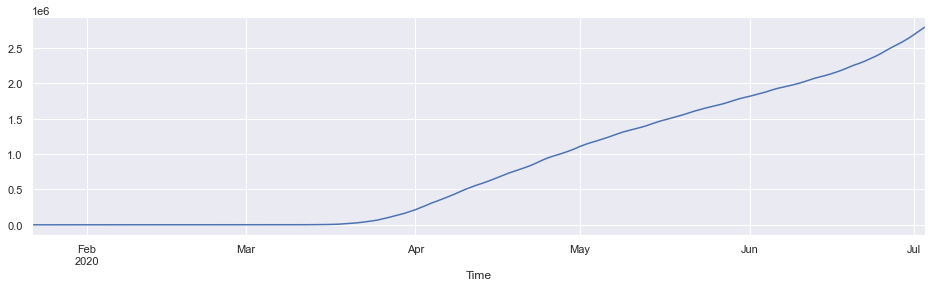

In [195]:
confirmed_dt.loc['2020']['total'].plot(figsize=(16, 4)); 

# Predictive Modelling on Cases Time Series With Facebook Prophet



In [196]:
x = confirmed_dt.reset_index()

In [197]:
#prophet requires 2 columns, a date time column and a 'y', or a target variable
x["ds"] = pd.to_datetime(x['Time'])
x["y"] = x['total']
data = x[["ds", "y"]]
data.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


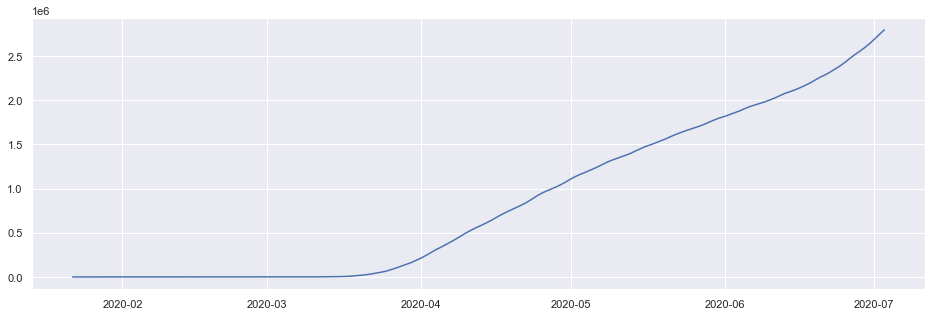

In [198]:
plt.plot(data.ds, data.y)

In [199]:
#instantiating the model
from fbprophet import Prophet
m = Prophet(yearly_seasonality=False, weekly_seasonality="auto", daily_seasonality="auto")

In [200]:
#fitting the model
%time m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Wall time: 298 ms


In [201]:
#cross validating the model
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(m,  initial="20 days", horizon="3 days", period="4 days")

INFO:fbprophet:Making 36 forecasts with cutoffs between 2020-02-11 00:00:00 and 2020-06-30 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [202]:
cv_results.shape

(108, 6)

In [203]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-12,13.790373,12.477356,15.014364,12,2020-02-11
1,2020-02-13,13.789478,12.380342,15.154120,13,2020-02-11
2,2020-02-14,14.788841,13.426979,16.077077,13,2020-02-11
3,2020-02-16,15.381281,14.049697,16.727810,13,2020-02-15
4,2020-02-17,16.380856,15.036604,17.651359,13,2020-02-15


In [204]:
#performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2.582353e+09,50816.856742,27596.175437,0.222301,0.019384,0.166667
1,2 days,3.566499e+09,59720.170884,33264.855244,0.238810,0.032457,0.111111
2,3 days,4.789708e+09,69207.713439,38918.305783,0.253668,0.034246,0.138889


In [205]:
# this makes an empty data frame for which we are going to predict the values
future = m.make_future_dataframe(periods=30, include_history=True) 
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [206]:
forecast = m.predict(future)

In [207]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1505.349791,-32917.556126,28624.817306,-1505.349791,-1505.349791,-1549.542580,-1549.542580,-1549.542580,-1549.542580,-1549.542580,-1549.542580,0.0,0.0,0.0,-3054.892371
1,2020-01-23,-1448.964429,-30244.772294,31512.548551,-1448.964429,-1448.964429,1118.985811,1118.985811,1118.985811,1118.985811,1118.985811,1118.985811,0.0,0.0,0.0,-329.978618
2,2020-01-24,-1392.579067,-26924.234711,32521.792126,-1392.579067,-1392.579067,4386.839667,4386.839667,4386.839667,4386.839667,4386.839667,4386.839667,0.0,0.0,0.0,2994.260599
3,2020-01-25,-1336.193705,-29598.396131,31065.691263,-1336.193705,-1336.193705,356.280842,356.280842,356.280842,356.280842,356.280842,356.280842,0.0,0.0,0.0,-979.912863
4,2020-01-26,-1279.808344,-32278.023111,27222.947934,-1279.808344,-1279.808344,-580.587487,-580.587487,-580.587487,-580.587487,-580.587487,-580.587487,0.0,0.0,0.0,-1860.395830


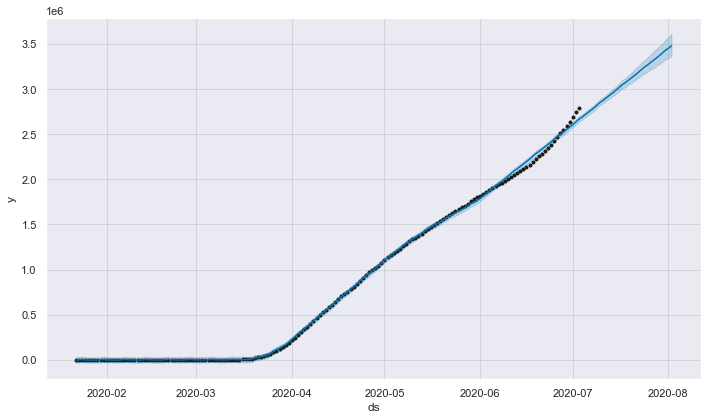

In [208]:
#future predictions
m.plot(forecast);

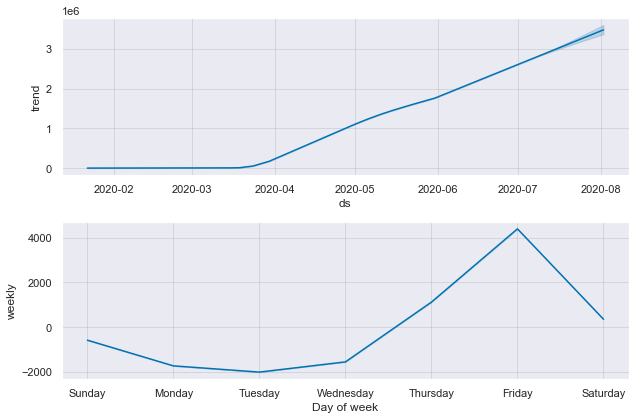

In [212]:
m.plot_components(forecast);

In [209]:
deaths = pd.read_csv('time_series_covid19_deaths_US.csv')

In [210]:
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,149,151,151,152,153,153,153,153,153,154
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [211]:
deaths.shape

(3261, 176)